# 1. Parkinson Datasets
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

- Sumber: UCI ML Repository – Parkinson’s Dataset
- Jumlah sampel: 195
- Jumlah fitur: 22 fitur numerik + 1 ID + 1 target
- Target: status → 1 = Parkinson, 0 = sehat

- MDVP:Fo(Hz) ->	Average vocal fundamental frequency
- MDVP:Fhi(Hz) ->	Maximum vocal fundamental frequency
- MDVP:Flo(Hz) ->	Minimum vocal fundamental frequency
- MDVP:Jitter(%), MDVP:Jitter(Abs) ->	Variation in pitch
- MDVP:RAP, MDVP:PPQ ->	Relative amplitude perturbation, pitch period
- MDVP:Shimmer ->	Variation in amplitude
- HNR ->	Harmonics-to-noise ratio
- RPDE, DFA ->	Nonlinear measures of voice signal complexity
- spread1, spread2 ->	Nonlinear features of voice signal
- PPE -> Nonlinear measure of pitch period variability

- Variabel seperti DFA, RPDE, spread1, spread2, PPE → mengukur kompleksitas sinyal suara yang tidak linear terhadap status Parkinson.
- Linear SVM sulit menangkap hubungan ini → RBF SVM lebih efektif.

## 2. Tahapan
- Load dataset → baca dari CSV UCI.
- Drop kolom non-fitur (name) → gunakan 22 fitur numerik.
- Split train/test → 70% train, 30% test, stratify target.
- Standarisasi → SVM sensitif terhadap skala.
- SVM RBF → menangkap hubungan non-linear antar fitur (DFA, RPDE, spread1/2, PPE).
- Prediksi & evaluasi → akurasi, confusion matrix, classification report.

In [33]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load dataset dari UCI (CSV)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

# Features dan target
X = data.drop(columns=['name', 'status'])
y = data['status']

In [15]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standarisasi fitur (SVM sensitif terhadap skala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat SVM dengan kernel RBF (non-linear)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Prediksi
y_pred = svm_rbf.predict(X_test_scaled)

In [17]:
# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8813559322033898

Confusion Matrix:
 [[ 8  7]
 [ 0 44]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59



## 3. Visualisasi Decision Boundary

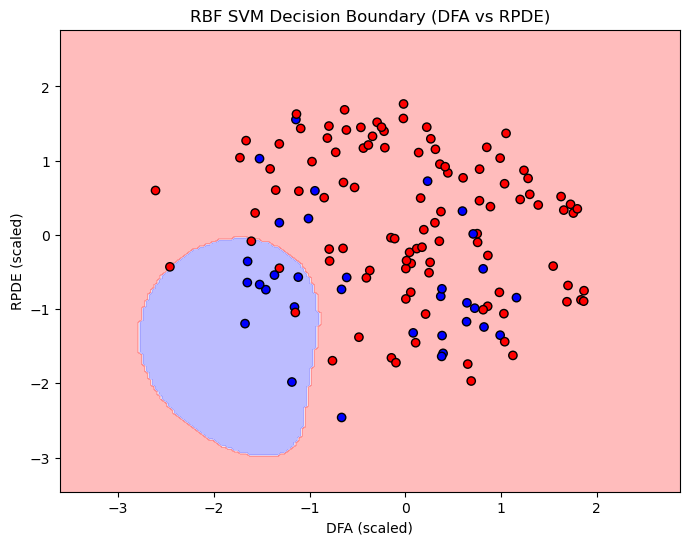

In [35]:
# Pilih dua fitur non-linear paling relevan untuk visualisasi
features = ['DFA', 'RPDE']
X = data[features].values
y = data['status'].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM dengan kernel RBF
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Buat mesh grid untuk visualisasi decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_train_scaled[:,0].min()-1, X_train_scaled[:,0].max()+1, 200),
    np.linspace(X_train_scaled[:,1].min()-1, X_train_scaled[:,1].max()+1, 200)
)
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, edgecolor='k', cmap='bwr')
plt.xlabel('DFA (scaled)')
plt.ylabel('RPDE (scaled)')
plt.title('RBF SVM Decision Boundary (DFA vs RPDE)')
plt.show()

- Warna area (merah/biru) → prediksi kelas pasien Parkinson (1) vs sehat (0).

- Titik scatter → data training asli, warna sesuai kelas.

- Decision boundary → garis tipis pemisah antara pasien Parkinson dan sehat menurut SVM RBF.

- Dengan hanya dua fitur non-linear ini, terlihat bagaimana SVM RBF dapat memisahkan kelas walaupun hubungan antar fitur tidak linear.

## Reference
- https://archive.ics.uci.edu/dataset/174/parkinsons 